### Imports

In [1]:
from glob import glob
from PIL import Image

### Constants

In [2]:
FLAG_PATHS = glob("flag_images/*.gif")
IMAGE_SIZE = (96, 96)
PADDING_COLOUR = (240, 0, 240)
OUTPUT_PATH = "training_data"

### Utilities

In [3]:
def pad_and_resize_image(img, image_size, pad_colour=(255, 255, 255)):
    width, height = img.size
    if width > height:
        new_width = image_size[0]
        resize_factor = width / new_width 
        new_height = int(height / resize_factor)
        to_pad = image_size[1] - new_height
    else:
        new_height = image_size[1]
        resize_factor = height / new_height 
        new_width = int(width / resize_factor)
        to_pad = image_size[1] - new_height

    resized = img.resize((new_width, new_height))
    resized_padded = Image.new("RGB", image_size, color=pad_colour)
    resized_padded.paste(resized, (0, 0))

    return resized_padded

In [4]:
images = [Image.open(path).convert("RGB") for path in FLAG_PATHS]

In [5]:
resized_imgs = [pad_and_resize_image(img, IMAGE_SIZE, PADDING_COLOUR) for img in images]

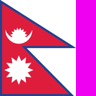

In [6]:
resized_imgs[165]

In [7]:
for i, img in enumerate(resized_imgs):
    img.save(f"{OUTPUT_PATH}/{i}.png", "PNG")